# Project Purpose
To inform people about their likelihood of suffering from a stroke or not in a timely-manner and with reliable results by just providing some information.

## Who benefits from this model/system
Any person who might feel having a stroke incedint might take advatange of this model. As well, it can be used in any hospital during the checkup process. 

# Data Description:
### what is the dataset and how to obtain it?
It is a stroke dataset that's collected from 43401 patients which describes their 10 significantly-related features to a stroke incident. A stroke is an incident that happens when the brains's blood vessels become narrowed or blocked. subsecuently, the blood cannot travel easily to the brain. Thus, the brain stops functioning due to suffering from stroke.
### features?
1-gender
2-age
3-hypertension
4-haert disease
5-ever married
6-work type
7-residence 
8-average glucose
9-bmi
10-smoking status
### prediction target value?
My model will predict whether this entry/case/patient is most likely to be diagnosed with stroke or not. Thus, my model will produce either yes/no , 0/1 classes which is a classification problem. 

# Imports

In [1]:
#import the propable needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

# Data preprocessing & EDA

In [2]:
#download the Stroke data 43400+ instances
stroke_data=pd.read_csv(r'C:\Users\Manar\Desktop\SDAIA(twaiq)\project\dataset\train_strokes.csv')

In [3]:
#print data info
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
#what is the number of null values in each column
stroke_data.isnull().sum(axis=0)

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

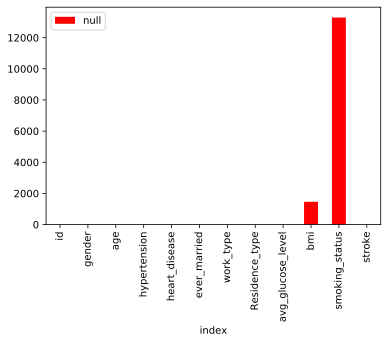

In [5]:
#visiualize the missing values per column
stroke_data.isnull().sum().reset_index(name="null").plot.bar(x='index', y='null', rot=90, color='red');

In [6]:
#pd.plotting.bootstrap_plot(stroke_data['bmi']);

In [7]:
#missing data imputation
bmi_mean = stroke_data['bmi'].mean()
stroke_data['bmi'].fillna(value=bmi_mean, inplace=True)
bmi_mean

28.605038390004545

In [8]:
stroke_data[stroke_data['bmi'].isnull()]#no records with empty bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [9]:
#pd.plotting.bootstrap_plot(stroke_data['bmi']);

In [10]:
smoking_mode=stroke_data['smoking_status'].mode()
smoking_mode

0    never smoked
dtype: object

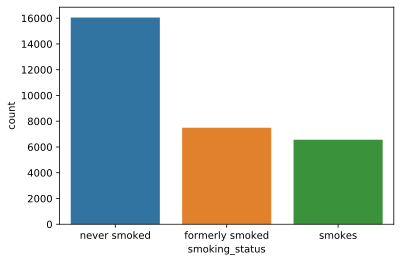

In [11]:
sns.countplot(x='smoking_status', data= stroke_data);

In [12]:
#missing data imputation
stroke_data['smoking_status']=stroke_data['smoking_status'].fillna(stroke_data['smoking_status'].value_counts().index[0])
stroke_data['smoking_status']

0           never smoked
1           never smoked
2           never smoked
3        formerly smoked
4           never smoked
              ...       
43395       never smoked
43396    formerly smoked
43397    formerly smoked
43398       never smoked
43399       never smoked
Name: smoking_status, Length: 43400, dtype: object

In [13]:
stroke_data[stroke_data['smoking_status'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


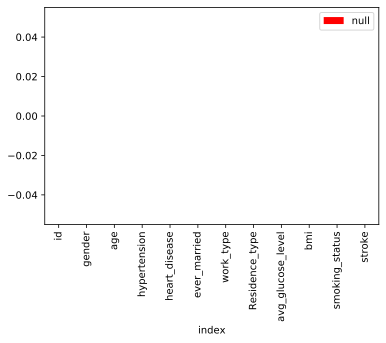

In [14]:
#visiualize the missing values per column
stroke_data.isnull().sum().reset_index(name="null").plot.bar(x='index', y='null', rot=90, color='red');
#no column has missing values

In [15]:
#print some stat
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [16]:
#print some random instances
stroke_data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4033,41263,Female,16.0,0,0,No,Private,Urban,75.06,23.5,never smoked,0
24287,49092,Male,33.0,0,0,Yes,Private,Urban,106.17,37.8,never smoked,0
29568,2441,Male,51.0,0,0,Yes,Self-employed,Rural,114.16,35.2,formerly smoked,0
29667,36193,Male,2.0,0,0,No,children,Rural,124.08,16.4,never smoked,0
36464,22752,Male,50.0,0,0,Yes,Private,Rural,78.94,20.4,never smoked,0
11265,67673,Female,28.0,0,0,Yes,Private,Rural,65.79,44.9,never smoked,0
29390,54699,Male,17.0,0,0,No,Private,Rural,78.06,22.8,never smoked,0
35854,31099,Female,22.0,0,0,No,Private,Rural,111.88,21.3,never smoked,0
41854,2992,Female,69.0,1,0,Yes,Private,Rural,90.54,35.0,never smoked,0
2360,50363,Female,73.0,1,0,Yes,Private,Rural,60.98,29.9,formerly smoked,0


In [17]:
#delete any unecessary columns [id]
stroke_data.drop(['id'],axis='columns',inplace=True)
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [18]:
#is there any floating age?
stroke_data[stroke_data['age']==float]
#no floating value

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [19]:
#change the gender column into 0FEMALE,1MALE
from sklearn.preprocessing import LabelEncoder
le_gender=LabelEncoder()
stroke_data['gender_encoded']=le_gender.fit_transform(stroke_data['gender']) #1=male,#0=female
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,1
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1


In [20]:
#now drop the gender column
stroke_data.drop(['gender'],axis='columns',inplace=True)
stroke_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded
0,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,1
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
2,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,0
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0
4,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,1
...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0
43396,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0
43397,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0
43398,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1


In [21]:
#change the yes/no column to 0NO,1YES
le_married=LabelEncoder()
stroke_data['ever_married_encoded']=le_gender.fit_transform(stroke_data['ever_married']) #1=married,#0=not married
stroke_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded
0,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,1,0
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1,1
2,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,0,0
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0,1
4,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0,0
43396,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0,1
43397,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0,1
43398,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1,1


In [22]:
#delete the ever_married column
stroke_data.drop(['ever_married'],axis='columns',inplace=True)
stroke_data

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded
0,3.0,0,0,children,Rural,95.12,18.0,never smoked,0,1,0
1,58.0,1,0,Private,Urban,87.96,39.2,never smoked,0,1,1
2,8.0,0,0,Private,Urban,110.89,17.6,never smoked,0,0,0
3,70.0,0,0,Private,Rural,69.04,35.9,formerly smoked,0,0,1
4,14.0,0,0,Never_worked,Rural,161.28,19.1,never smoked,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,children,Urban,58.64,20.4,never smoked,0,0,0
43396,56.0,0,0,Govt_job,Urban,213.61,55.4,formerly smoked,0,0,1
43397,82.0,1,0,Private,Urban,91.94,28.9,formerly smoked,0,0,1
43398,40.0,0,0,Private,Urban,99.16,33.2,never smoked,0,1,1


In [23]:
stroke_data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

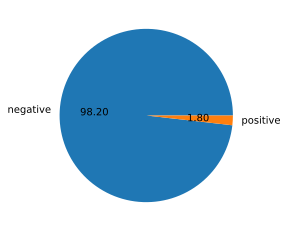

In [24]:
#sns.countplot(x='stroke', data=stroke_data);
plt.pie([42617,783],labels=['negative','positive'],autopct='%.2f');

In [25]:
#check for redundant rows
stroke_data[stroke_data.duplicated()]

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded


In [26]:
#no duplicated rows

In [27]:
#positive cases
stroke_data[stroke_data.stroke==1].head(10)

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded
63,67.0,0,1,Private,Urban,228.69,36.600000,formerly smoked,1,1,1
81,61.0,0,0,Self-employed,Rural,202.21,28.605038,never smoked,1,0,1
141,80.0,0,1,Private,Rural,105.92,32.500000,never smoked,1,1,1
257,49.0,0,0,Private,Urban,171.23,34.400000,smokes,1,0,1
264,79.0,1,0,Self-employed,Rural,174.12,24.000000,never smoked,1,0,1
288,81.0,0,0,Private,Urban,186.21,29.000000,formerly smoked,1,1,1
291,74.0,1,1,Private,Rural,70.09,27.400000,never smoked,1,1,1
320,69.0,0,0,Private,Urban,94.39,22.800000,never smoked,1,0,0
407,59.0,0,0,Private,Rural,76.15,28.605038,never smoked,1,0,1
426,78.0,0,0,Private,Urban,58.57,24.200000,never smoked,1,0,1


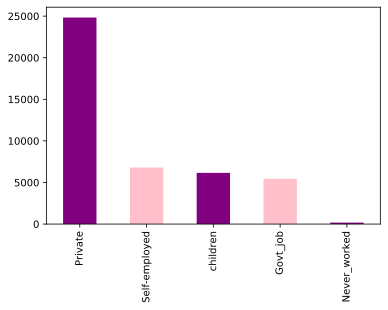

In [28]:
stroke_data['work_type'].value_counts().plot.bar(x='index',y='v',color=['purple','pink']);

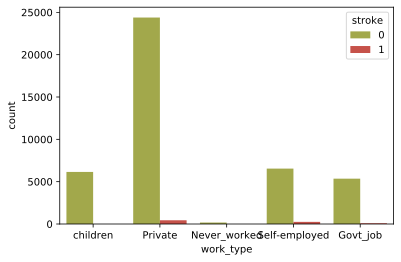

In [29]:
sns.countplot(x='work_type',data=stroke_data,hue='stroke',palette=['#AFB83B','#DB4035']);

In [30]:
stroke_data['Residence_type'].value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

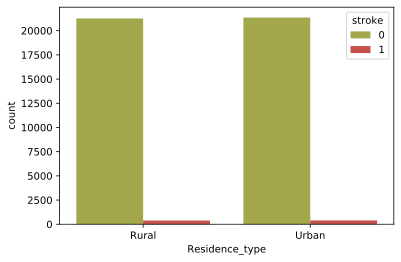

In [31]:
sns.countplot(x='Residence_type',data=stroke_data,hue='stroke',palette=['#AFB83B','#DB4035']);

In [32]:
stroke_data['smoking_status'].value_counts()

never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

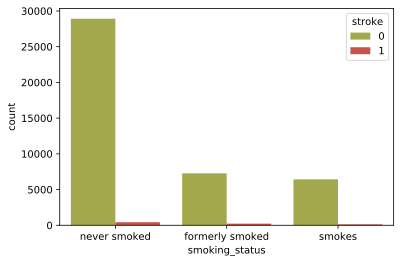

In [33]:
sns.countplot(x='smoking_status',data=stroke_data,hue='stroke',palette=['#AFB83B','#DB4035']);

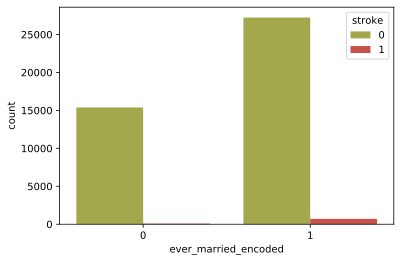

In [34]:
sns.countplot(x='ever_married_encoded',data=stroke_data,hue='stroke',palette=['#AFB83B','#DB4035']);

In [35]:
#drop gender code 2 since it has no values
stroke_data.drop(stroke_data.loc[stroke_data['gender_encoded']==2].index,inplace=True)

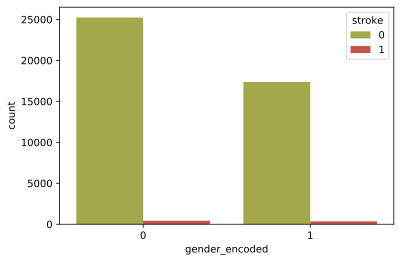

In [36]:
sns.countplot(x='gender_encoded',data=stroke_data,hue='stroke',palette=['#AFB83B','#DB4035']);

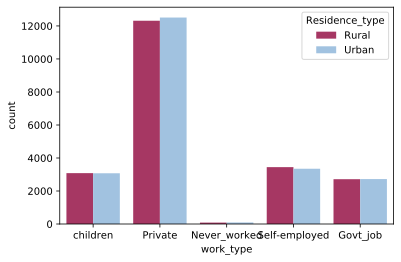

In [37]:
sns.countplot(x='work_type',data=stroke_data,hue='Residence_type',palette=['#B8255F','#96C3EB']);

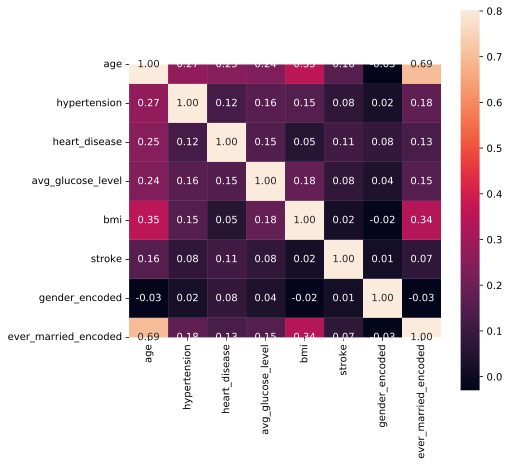

In [38]:
#correlation
correlation=stroke_data.corr()
fig,axes=plt.subplots(figsize=(7,7))
sns.heatmap(correlation,vmax=.8,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10});

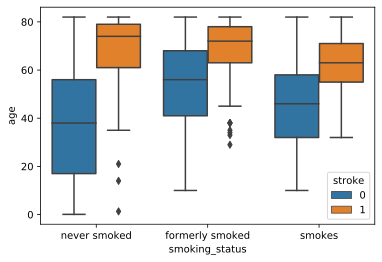

In [39]:
#plt.figure(figsize=(12,5))
sns.boxplot(y='age', x='smoking_status',hue='stroke' ,data=stroke_data);

In [40]:
#detect and remove outliers from above chart
stroke_data.drop(stroke_data[(stroke_data['age']<50) & (stroke_data['smoking_status']=='formerly smoked') & (stroke_data['stroke']==1)].index,inplace=True)
stroke_data.drop(stroke_data[(stroke_data['age']<40) & (stroke_data['smoking_status']=='never smoked') & (stroke_data['stroke']==1)].index,inplace=True)

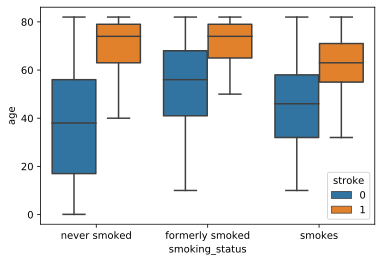

In [41]:
#check for outliers again
sns.boxplot(y='age', x='smoking_status',hue='stroke' ,data=stroke_data);
#that's great no outliers

In [42]:
#use sampling methods to overcome the imbalance issue

#most propably will use oversamplig 
#=upsampling=make the minorty class's instances 
#equal to the majority's class instances
#to have larger data not smaller.

In [56]:
stroke_data.sample(10)

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded
5331,49.0,0,0,Private,Urban,128.15,25.9,smokes,0,0,1
10054,60.0,0,0,Private,Rural,99.99,24.5,never smoked,0,0,1
16087,38.0,0,0,Private,Rural,62.97,29.0,formerly smoked,0,1,1
24524,21.0,0,0,Private,Urban,71.20,23.3,never smoked,0,0,1
31336,18.0,0,0,Private,Rural,98.41,32.6,never smoked,0,1,0
4069,22.0,0,0,Private,Urban,87.40,34.8,never smoked,0,0,0
13920,56.0,0,0,Private,Urban,61.20,26.5,never smoked,0,1,1
24879,74.0,0,0,Private,Urban,82.37,24.5,never smoked,0,0,1
38497,52.0,0,0,Private,Urban,103.68,33.3,formerly smoked,0,0,1
40671,34.0,0,0,Private,Urban,129.38,44.5,never smoked,0,0,0


In [58]:
#convert all variable to numerical variables
work_dummies = pd.get_dummies(stroke_data.work_type)
work_dummies.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [60]:
df_with_dummies = pd.concat([stroke_data,work_dummies],axis='columns')
df_with_dummies.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children
0,3.0,0,0,children,Rural,95.12,18.0,never smoked,0,1,0,0,0,0,0,1
1,58.0,1,0,Private,Urban,87.96,39.2,never smoked,0,1,1,0,0,1,0,0
2,8.0,0,0,Private,Urban,110.89,17.6,never smoked,0,0,0,0,0,1,0,0
3,70.0,0,0,Private,Rural,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0
4,14.0,0,0,Never_worked,Rural,161.28,19.1,never smoked,0,1,0,0,1,0,0,0


In [61]:
df_with_dummies.drop('work_type',axis='columns',inplace=True)
df_with_dummies.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children
0,3.0,0,0,Rural,95.12,18.0,never smoked,0,1,0,0,0,0,0,1
1,58.0,1,0,Urban,87.96,39.2,never smoked,0,1,1,0,0,1,0,0
2,8.0,0,0,Urban,110.89,17.6,never smoked,0,0,0,0,0,1,0,0
3,70.0,0,0,Rural,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0
4,14.0,0,0,Rural,161.28,19.1,never smoked,0,1,0,0,1,0,0,0


In [62]:
res_dummies = pd.get_dummies(stroke_data.Residence_type)
res_dummies.head()

,Rural,Urban
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [63]:
df_with_dummies = pd.concat([df_with_dummies,res_dummies],axis='columns')
df_with_dummies.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban
0,3.0,0,0,Rural,95.12,18.0,never smoked,0,1,0,0,0,0,0,1,1,0
1,58.0,1,0,Urban,87.96,39.2,never smoked,0,1,1,0,0,1,0,0,0,1
2,8.0,0,0,Urban,110.89,17.6,never smoked,0,0,0,0,0,1,0,0,0,1
3,70.0,0,0,Rural,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0,1,0
4,14.0,0,0,Rural,161.28,19.1,never smoked,0,1,0,0,1,0,0,0,1,0


In [64]:
df_with_dummies.drop('Residence_type',axis='columns',inplace=True)
df_with_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban
0,3.0,0,0,95.12,18.0,never smoked,0,1,0,0,0,0,0,1,1,0
1,58.0,1,0,87.96,39.2,never smoked,0,1,1,0,0,1,0,0,0,1
2,8.0,0,0,110.89,17.6,never smoked,0,0,0,0,0,1,0,0,0,1
3,70.0,0,0,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0,1,0
4,14.0,0,0,161.28,19.1,never smoked,0,1,0,0,1,0,0,0,1,0


In [65]:
smok_dummies = pd.get_dummies(stroke_data.smoking_status)
smok_dummies.head()

,formerly smoked,never smoked,smokes
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [66]:
df_with_dummies = pd.concat([df_with_dummies,smok_dummies],axis='columns')
df_with_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
0,3.0,0,0,95.12,18.0,never smoked,0,1,0,0,0,0,0,1,1,0,0,1,0
1,58.0,1,0,87.96,39.2,never smoked,0,1,1,0,0,1,0,0,0,1,0,1,0
2,8.0,0,0,110.89,17.6,never smoked,0,0,0,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0,1,0,1,0,0
4,14.0,0,0,161.28,19.1,never smoked,0,1,0,0,1,0,0,0,1,0,0,1,0


In [67]:
df_with_dummies.drop('smoking_status',axis='columns',inplace=True)
df_with_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,1,1,0,0,1,0
1,58.0,1,0,87.96,39.2,0,1,1,0,0,1,0,0,0,1,0,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,0,0,1,0,0,1,0,0,1,0,1,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [70]:
#split the data and organize it
#test firstly without resampling techniques and then resampling and compare
X=df_with_dummies.drop('stroke',axis='columns')
y=df_with_dummies['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [72]:
#build the classifier
model =  RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#score = cross_val_score(model, X_train, y_train, cv = 6)
#precision = precision_score(y_test, y_pred)
#roc = roc_auc_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)

In [76]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
model.score(X_test,y_test)

0.9830130668716373

In [44]:
#test the data on unseen data

In [45]:
#print some measures
#accuracy,precesion,recall,etc
#confusion matrix